In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats

Загружаем необходимые библиотеки и данные. Смотрим на данные. Вычисляем долю пропущенных значений.

In [2]:
data = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

In [3]:
data.head(20)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
profile_id                 860065 non-null object
os_version                 860079 non-null object
device_manufacturer        860079 non-null object
device_model               860079 non-null object
device_type                860079 non-null object
device_locale              860079 non-null object
event_name                 860079 non-null object
event_json                 860079 non-null object
event_datetime             860079 non-null object
event_timestamp            860079 non-null int64
event_receive_datetime     860079 non-null object
event_receive_timestamp    860079 non-null int64
connection_type            860079 non-null object
operator_name              841200 non-null object
country_iso_code           860079 non-null object
city                       536371 non-null object
dtypes: int64(2), object(14)
memory usage: 105.0+ MB


In [5]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=False)

city                       0.376370
operator_name              0.021950
profile_id                 0.000016
country_iso_code           0.000000
connection_type            0.000000
event_receive_timestamp    0.000000
event_receive_datetime     0.000000
event_timestamp            0.000000
event_datetime             0.000000
event_json                 0.000000
event_name                 0.000000
device_locale              0.000000
device_type                0.000000
device_model               0.000000
device_manufacturer        0.000000
os_version                 0.000000
dtype: float64

Разбираем столбец, содержащий json строки на несколько столбцов.

In [6]:
json_df = data['event_json'].apply(json.loads)
json_df = pd.DataFrame.from_records(json_df.values)
data = pd.concat([data, json_df], axis=1)

Смотрим результат.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 33 columns):
profile_id                 860065 non-null object
os_version                 860079 non-null object
device_manufacturer        860079 non-null object
device_model               860079 non-null object
device_type                860079 non-null object
device_locale              860079 non-null object
event_name                 860079 non-null object
event_json                 860079 non-null object
event_datetime             860079 non-null object
event_timestamp            860079 non-null int64
event_receive_datetime     860079 non-null object
event_receive_timestamp    860079 non-null int64
connection_type            860079 non-null object
operator_name              841200 non-null object
country_iso_code           860079 non-null object
city                       536371 non-null object
ad_type                    860079 non-null object
placement                  860079 non-nul

Удаляем вспомогательный DataFrame и создаем новые переменные для дней недели и часов. Заполняем пропущенные значения city.

In [8]:
del json_df

data['event_datetime'] = pd.to_datetime(data['event_datetime'])
data.loc[:,'time']=data['event_datetime'].dt.hour.astype(object)
data.loc[:,'day_of_week']=data['event_datetime'].dt.weekday.astype(object)

data['city'].fillna('unknown', inplace=True)

Посмотрим, как распределилось общее количество показов по типам рекламы. Почти 95% всех показов - баннеры. 

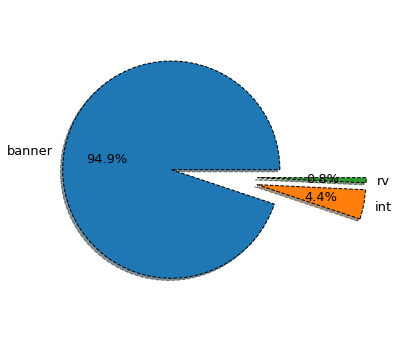

In [9]:
ad_type_proc = data.groupby(['ad_type']).agg(ad_type_count=('event_json', np.size)).reset_index()
vals = ad_type_proc['ad_type_count']
labels = ad_type_proc['ad_type']
explode = tuple([0.4 for i in range(len(vals))])
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
       textprops={'fontsize': 13}, rotatelabels=False)
ax.axis("equal")
plt.show()

Теперь помотрим, как распределились доходы по типам рекламы. Более 56% доходов это полноэкранная реклама(int). Таким образом 4.4% показов принесли более 56% прибыли.

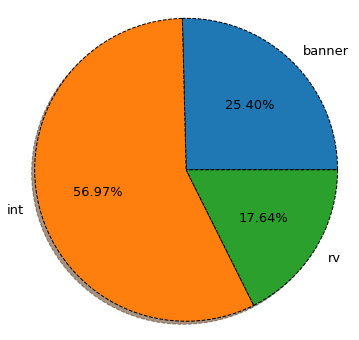

In [10]:
ad_type_income = data.groupby(['ad_type']).agg(income=('revenue', sum)).reset_index()
vals = ad_type_income['income']
labels = ad_type_income['ad_type']
explode = tuple([0. for i in range(len(vals))])
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(vals, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},textprops={'fontsize': 13}, rotatelabels=False)
ax.axis("equal")
plt.show()

Посмотрим, как распределились средние eCPM пользователей по типу рекламы.

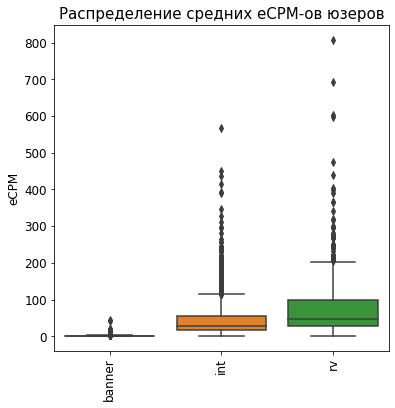

In [11]:
data_grouped_event_name = data.groupby(['profile_id', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x) * 1000})
fig,ax = plt.subplots(figsize=(6,6))    
ax = sns.boxplot(data=data_grouped_event_name, x='ad_type', y='revenue')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.set_title('Распределение средних eCPM-ов юзеров', fontsize=15)                
plt.show()

Оценим распределение данных в группах и значимость различий между ними. Все группы имеют распределения отличные от нормального. Используем ранговый дисперсионный анализ Краскела-Уоллиса. И получаем значимые различия между группами. 

In [12]:
banner_ = data_grouped_event_name.query('ad_type=="banner"')['revenue']
int_ = data_grouped_event_name.query('ad_type=="int"')['revenue']
rv_ = data_grouped_event_name.query('ad_type=="rv"')['revenue']

In [13]:
stat_banner = stats.shapiro(banner_)
stat_int = stats.shapiro(int_)
stat_rv = stats.shapiro(rv_)
print(stat_banner, stat_int, stat_rv)

(0.4789016842842102, 0.0) (0.7057675719261169, 0.0) (0.7415374517440796, 3.137367131776833e-41)


In [14]:
stats.mstats.kruskalwallis(banner_.values, int_.values, rv_.values)

KruskalResult(statistic=6413.214825578622, pvalue=0.0)

Прежде чем строить грфики распределения eCPM по версиям ОС, посмотрим какое количество уникальных пользователей использует определенные ОС. Количество пользователей неравномерно. Можно сделать вывод, что eCPM пользователей с 10, 11, 12 и 9 ОС будет более интересен.


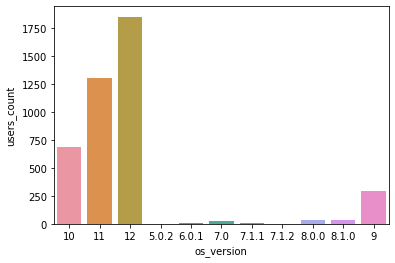

In [15]:
data_grouped_os = data.groupby(['os_version', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x) * 1000})
order_bar = sorted(data_grouped_os['os_version'].unique())

os_users = data.groupby(['os_version']).agg(users_count=('profile_id', lambda x: x.nunique())).reset_index()
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=os_users, x='os_version', y='users_count', order=order_bar)
plt.show()

Теперь посмотрим, сколько показов рекламы различных типов приходится на различные типы ОС.

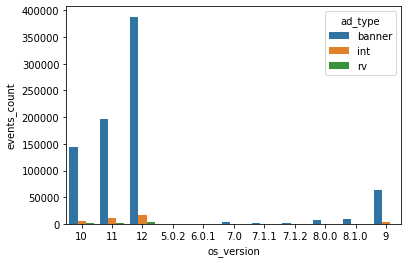

In [16]:
os_events = data.groupby(['os_version', 'ad_type']).agg(events_count=('event_json', np.size)).reset_index()
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=os_events, x='os_version',y='events_count', hue='ad_type', order=order_bar)
plt.show()

Построим график eCPM по типам ОС. Пользователи с 10, 11, 12 и 9 ОС показывают высокий eCPM по всем видам рекламы. Это важные группы, так как они и являются основными пользователями мобильной игры. Также высокий eCPM у пользователей с 7 ОС при просмотре видео и полноэкранной рекламы, но их количество незначительно.

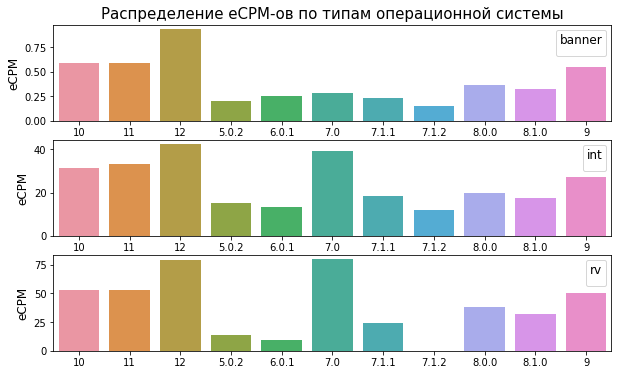

In [17]:
fig, (ax, ax2, ax3)=plt.subplots(3, 1, figsize=(10, 6))    
sns.barplot(data=data_grouped_os.query('ad_type=="banner"'), x='os_version', y='revenue', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_os.query('ad_type=="int"'), x='os_version', y='revenue', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_os.query('ad_type=="rv"'), x='os_version', y='revenue', order=order_bar, ax=ax3)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.legend(title='banner', title_fontsize = "12", labels=[])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('eCPM', fontsize=12)
ax2.legend(title='int', title_fontsize = "12", labels=[])
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('eCPM', fontsize=12)
ax3.legend(title='rv', title_fontsize = "12", labels=[])
ax.set_title('Распределение eCPM-ов по типам операционной системы', fontsize=15)                
plt.show()


Доходы распределились согласно предыдущим наблюдениям. Самая доходная группа - пользователи с 12 ОС.

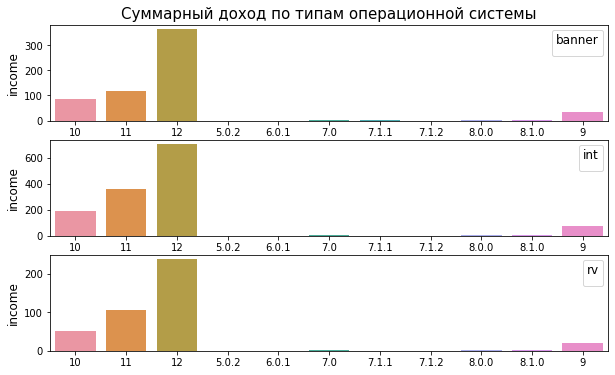

In [18]:
data_grouped_os_income = data.groupby(['os_version', 'ad_type'], as_index=False).agg({'revenue': sum})
order_bar = sorted(data_grouped_os_income['os_version'].unique())

fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))    
sns.barplot(data=data_grouped_os_income.query('ad_type=="banner"'), x='os_version', y='revenue', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_os_income.query('ad_type=="int"'), x='os_version', y='revenue', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_os_income.query('ad_type=="rv"'), x='os_version', y='revenue', order=order_bar, ax=ax3)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('income', fontsize=12)
ax.legend(title='banner', title_fontsize = "12", labels=[])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('income', fontsize=12)
ax2.legend(title='int', title_fontsize = "12", labels=[])
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('income', fontsize=12)
ax3.legend(title='rv', title_fontsize = "12", labels=[])
ax.set_title('Суммарный доход по типам операционной системы', fontsize=15)                
plt.show()

Рассмотрим, как распределился eCPM по вемени суток. Во всех группах наблюдается незначительный подъем eCPM в обеденное время и спад сразу после. Более выражено это в группе видео с просмотром по желанию(rv).

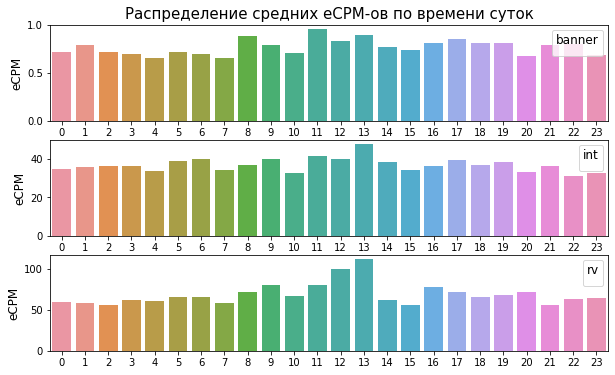

In [19]:
data_grouped_time = data.groupby(['time', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x)*1000})

fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))    
sns.barplot(data=data_grouped_time.query('ad_type=="banner"'), x='time', y='revenue', ax=ax)
sns.barplot(data=data_grouped_time.query('ad_type=="int"'), x='time', y='revenue', ax=ax2)
sns.barplot(data=data_grouped_time.query('ad_type=="rv"'), x='time', y='revenue', ax=ax3)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.legend(title='banner', title_fontsize = "12", labels=[], loc='upper right')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('eCPM', fontsize=12)
ax2.legend(title='int', title_fontsize = "12", labels=[], loc='upper right')
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('eCPM', fontsize=12)
ax3.legend(title='rv', title_fontsize = "12", labels=[], loc='upper right')
ax.set_title('Распределение средних eCPM-ов по времени суток', fontsize=15)                
plt.show()

Далее, построи графики распределения различных показателей по городам. Рассмотрим eCPM, суммарный доход, количество уникальных пользователей и показов. По графикам можно сделать выводы, что высокий eCPM не всегда означает высокий доход, города со средним eCPM и большим количеством пользователей часто более выгодны, несколько пользователей с очень высоким eCPM иногда приносят значительную долю дохода.

In [20]:
data_grouped_city = data.query('city!="unknown"').groupby(['city', 'ad_type']).agg(ecpm=('revenue', np.mean), income=('revenue', sum), 
                                                                                   users_count=('profile_id', lambda x: x.nunique()), events_count=('event_json', np.size))
data_grouped_city = data_grouped_city.reset_index()
data_grouped_city['ecpm'] *= 1000

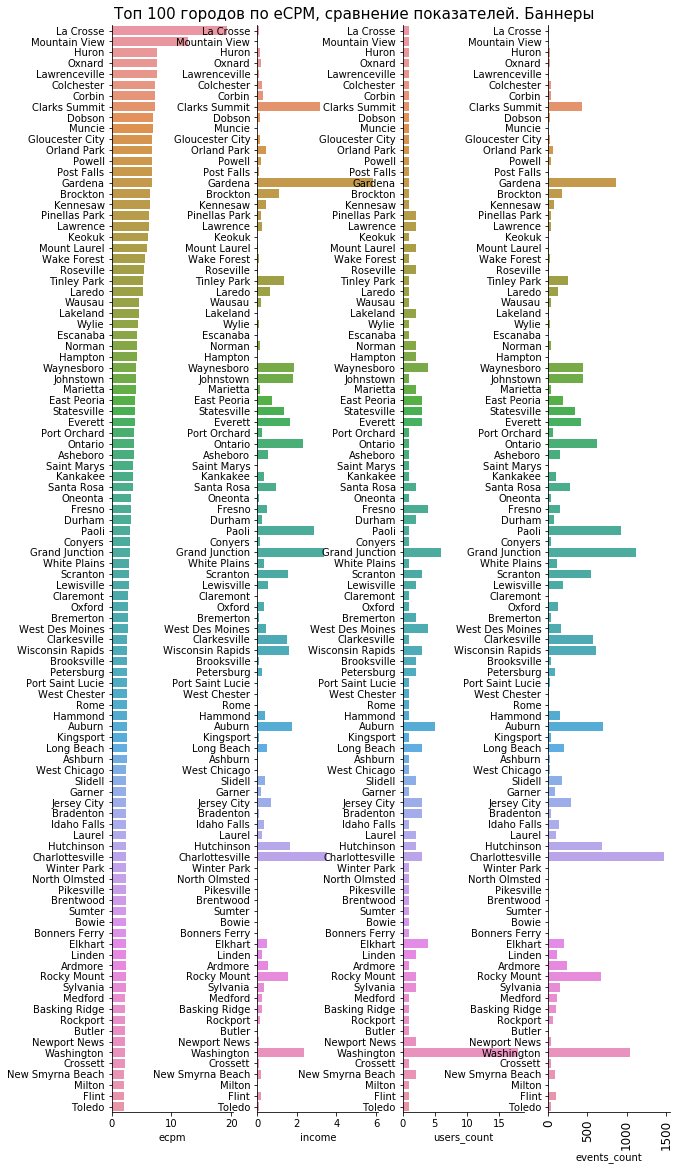

In [21]:
data_grouped_city_banner = data_grouped_city.query('ad_type=="banner"')
data_grouped_city_banner_ecpm = data_grouped_city_banner.sort_values(by='ecpm', ascending=False).head(100)

fig, (ax, ax2, ax3, ax4)=plt.subplots(1, 4, figsize=(10, 20))    
sns.barplot(data=data_grouped_city_banner_ecpm, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_banner_ecpm, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_banner_ecpm, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_banner_ecpm, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по eCPM, сравнение показателей. Баннеры', fontsize=15, x=2)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

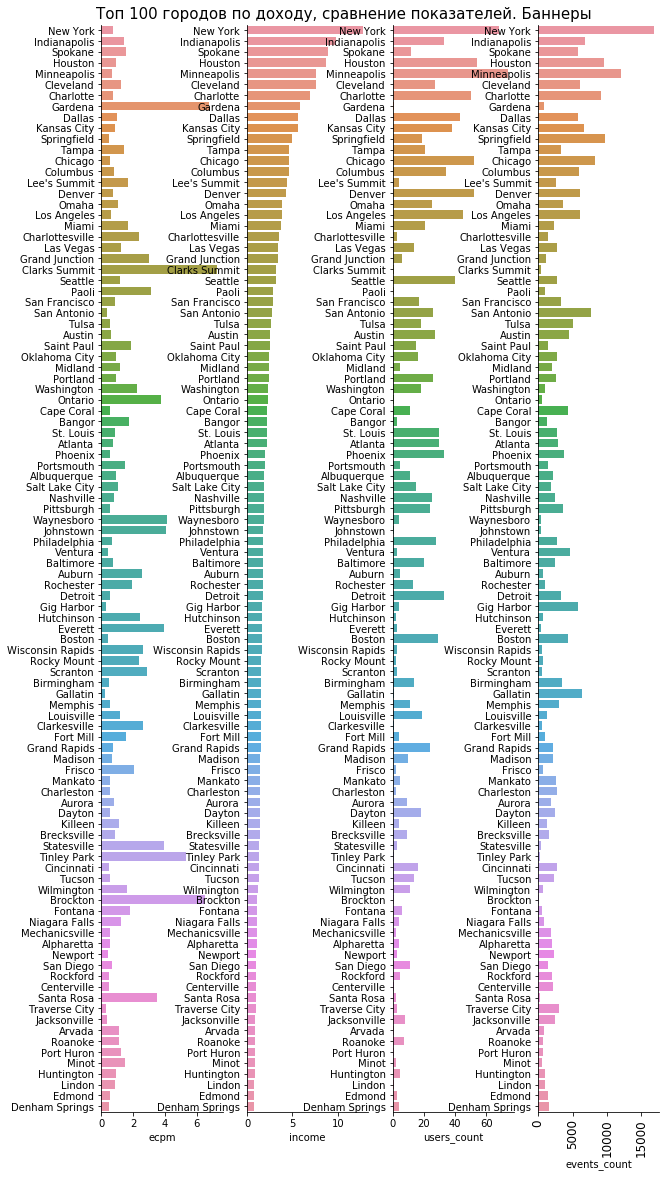

In [22]:
data_grouped_city_banner_income = data_grouped_city_banner.sort_values(by='income', ascending=False).head(100)

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 20))    
sns.barplot(data=data_grouped_city_banner_income, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_banner_income, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_banner_income, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_banner_income, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по доходу, сравнение показателей. Баннеры', fontsize=15, x=2)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

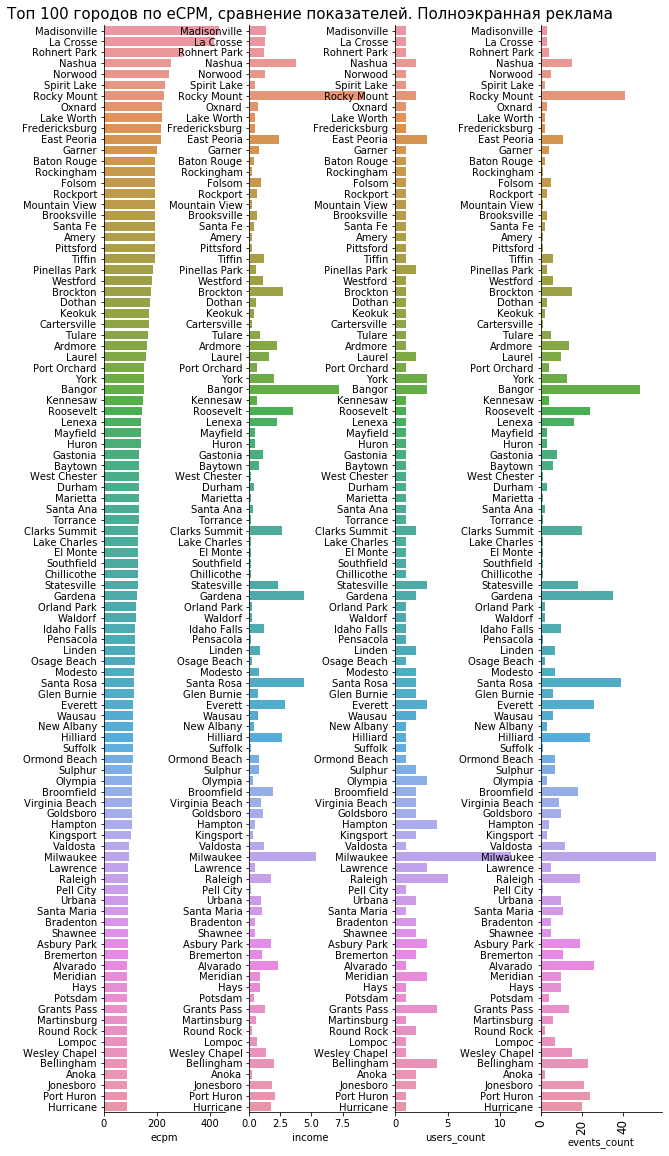

In [23]:
data_grouped_city_int = data_grouped_city.query('ad_type=="int"')

data_grouped_city_int_ecpm = data_grouped_city_int.sort_values(by='ecpm', ascending=False).head(100)

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 20))    
sns.barplot(data=data_grouped_city_int_ecpm, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_int_ecpm, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_int_ecpm, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_int_ecpm, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по eCPM, сравнение показателей. Полноэкранная реклама', fontsize=15, x=1.7)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()


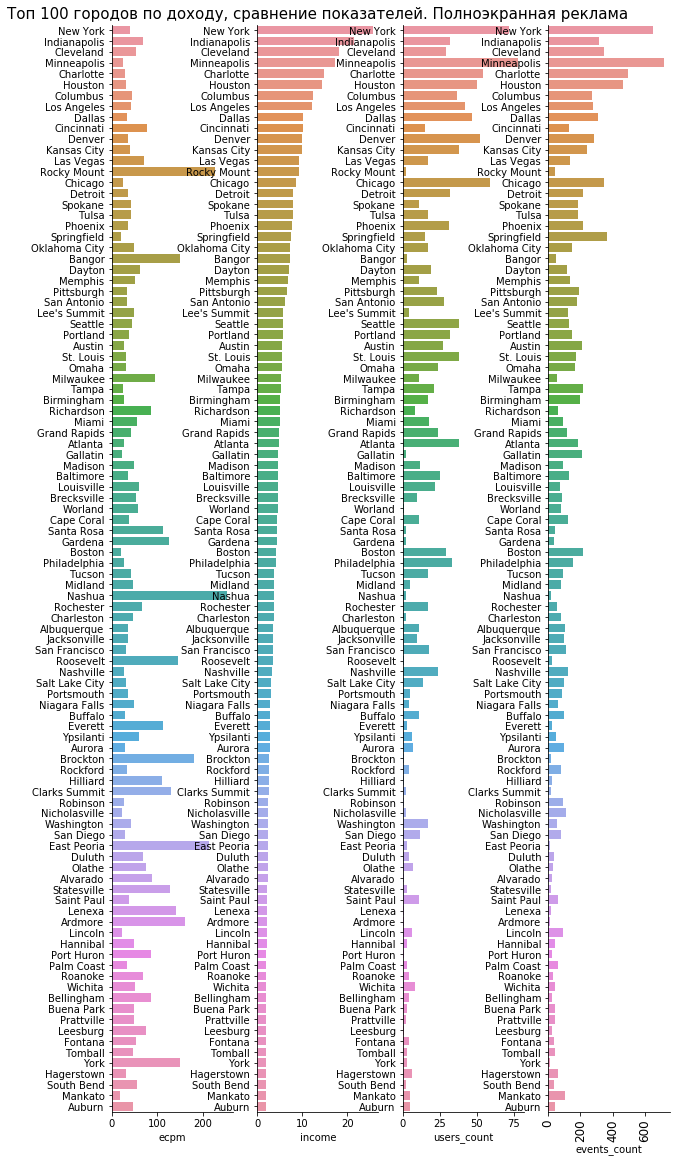

In [24]:
data_grouped_city_int_income = data_grouped_city_int.sort_values(by='income', ascending=False).head(100)

fig,(ax,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,20))    
sns.barplot(data=data_grouped_city_int_income, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_int_income, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_int_income, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_int_income, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по доходу, сравнение показателей. Полноэкранная реклама', fontsize=15, x=1.7)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

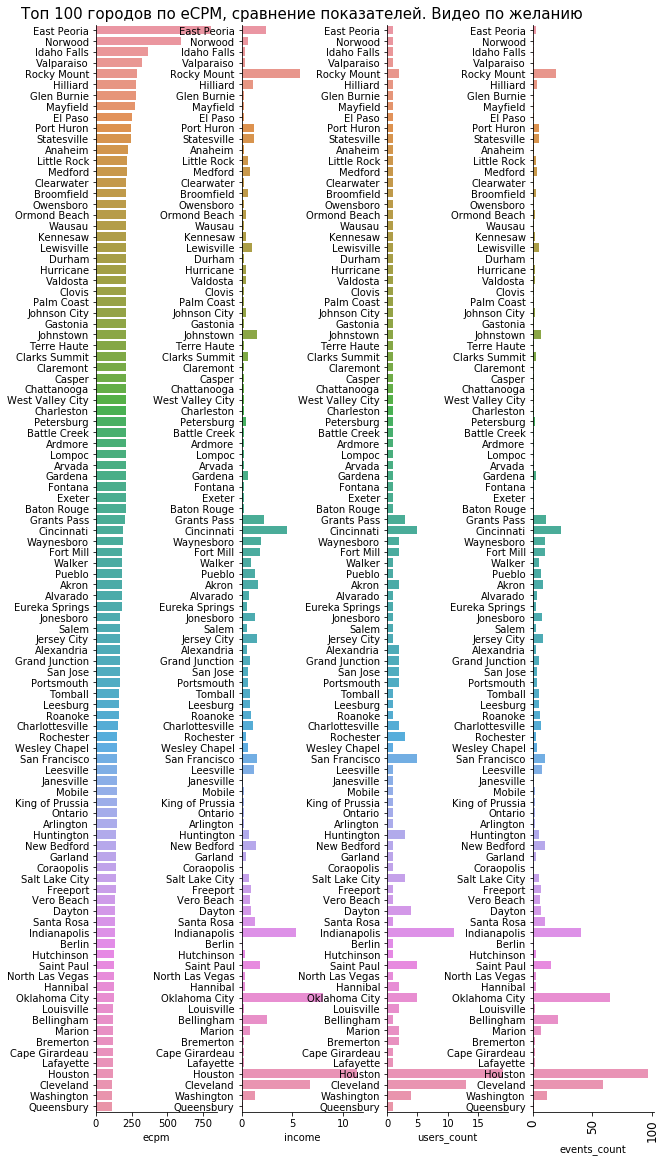

In [25]:
data_grouped_city_rv = data_grouped_city.query('ad_type=="rv"')

data_grouped_city_rv_ecpm = data_grouped_city_rv.sort_values(by='ecpm', ascending=False).head(100)

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 20))    
sns.barplot(data=data_grouped_city_rv_ecpm, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_rv_ecpm, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_rv_ecpm, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_rv_ecpm, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по eCPM, сравнение показателей. Видео по желанию',fontsize=15, x=1.7)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()


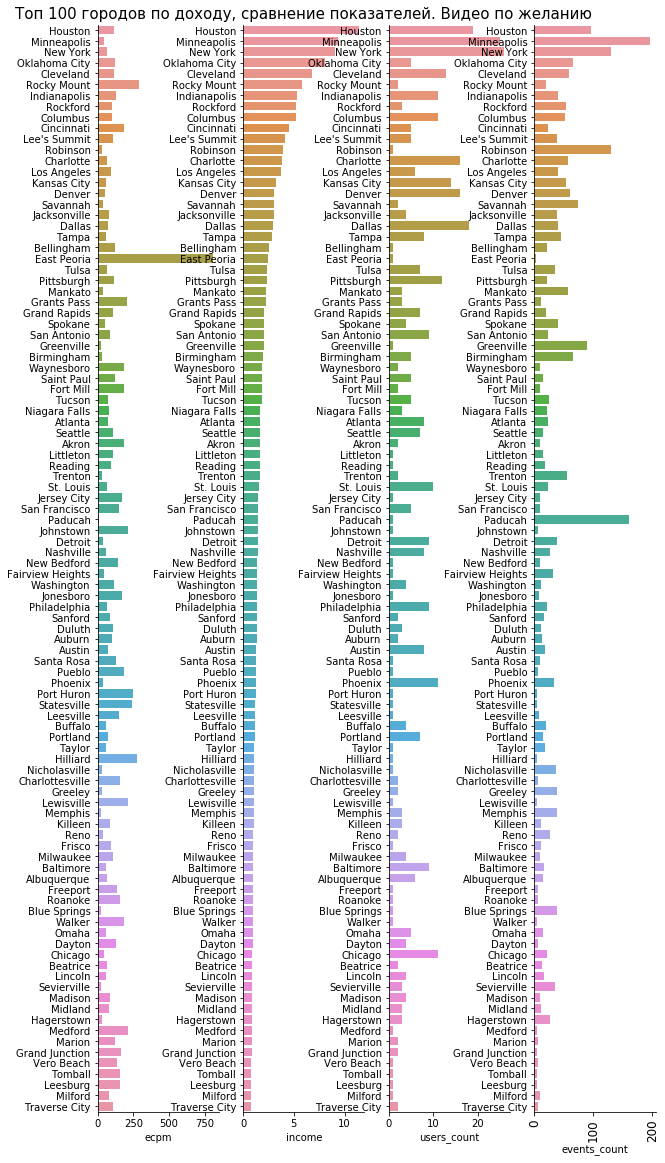

In [26]:
data_grouped_city_rv_income = data_grouped_city_rv.sort_values(by='income', ascending=False).head(100)

fig,(ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(10, 20))    
sns.barplot(data=data_grouped_city_rv_income, x='ecpm', y='city', ax=ax)
sns.barplot(data=data_grouped_city_rv_income, x='income', y='city', ax=ax2)
sns.barplot(data=data_grouped_city_rv_income, x='users_count', y='city', ax=ax3)
sns.barplot(data=data_grouped_city_rv_income, x='events_count', y='city', ax=ax4)
ax.set_ylabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_ylabel('', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)
ax.set_title('Топ 100 городов по доходу, сравнение показателей. Видео по желанию',fontsize=15, x=1.7)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()


Теперь, пришло время оценить какие из переменных еще могут повлиять на доход от просмотров. Рассмотрим категориальные переменные и оценим взаимную информацию(mutual information) между ними и доходом от показа рекламы.

In [27]:
X = data.copy()
objcols = X.select_dtypes(include=object).columns.tolist()
objcols.append('revenue')
X = X[objcols]

Посмотрим на количество уникальных значений различных переменных и удалим те из них, которые имеют константное значение, а также непреобразованную пременную datetime. После заполним пропуски в данных.

In [28]:
X.nunique()

profile_id                  4226
os_version                    11
device_manufacturer           34
device_model                 284
device_type                    2
device_locale                  9
event_name                     1
event_json                860076
event_receive_datetime    180237
connection_type                3
operator_name                 92
country_iso_code               1
city                         921
ad_type                        3
placement                      9
currency                       1
ad_country_code                9
network_name                   4
ad_unit_id                     3
ad_network_placement          27
creativeId                509066
time                          24
day_of_week                    7
revenue                   178126
dtype: int64

In [29]:
X.drop(['creativeId', 'event_json', 'event_name', 'country_iso_code', 'currency', 'event_receive_datetime'], axis=1, inplace=True)
X.fillna('unknown', inplace=True)

In [30]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname],_= X[colname].factorize()    
    mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

Вычислим mutual information по категориям рекламы (т.к. на различные типы могут влиять различные факторы) и построим графики важности переменных.

BANNER
ad_network_placement    0.872944
network_name            0.730650
day_of_week             0.575566
time                    0.335328
profile_id              0.042144
operator_name           0.028363
os_version              0.022889
device_manufacturer     0.022021
city                    0.017920
device_model            0.012411
connection_type         0.011149
ad_type                 0.005998
device_type             0.004664
device_locale           0.003671
ad_country_code         0.003421
ad_unit_id              0.001701
placement               0.000000
Name: MI Scores, dtype: float64


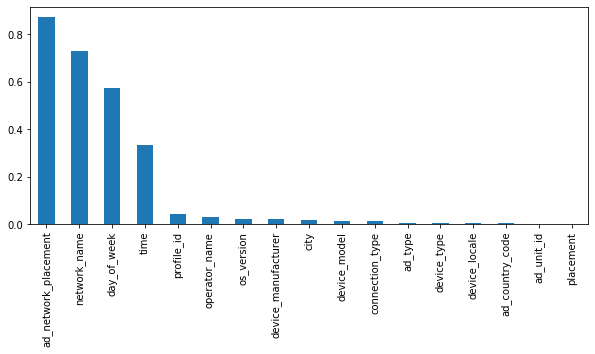

In [31]:
X_banner = X.query('ad_type=="banner"').sample(frac=0.05, replace=False, random_state=0)
y_banner = X_banner.pop("revenue")
mi_banner = make_mi_scores(X_banner, y_banner)
del X_banner, y_banner
print('BANNER')
print(mi_banner)
mi_banner.sort_values(ascending=False).plot.bar(figsize=(10, 4))


INT
network_name            0.882418
ad_network_placement    0.858726
day_of_week             0.332515
time                    0.101143
profile_id              0.059058
os_version              0.053604
operator_name           0.034175
device_model            0.028714
city                    0.027141
device_manufacturer     0.018850
placement               0.014931
connection_type         0.013822
device_type             0.008622
device_locale           0.004999
ad_type                 0.002056
ad_country_code         0.000206
ad_unit_id              0.000000
Name: MI Scores, dtype: float64


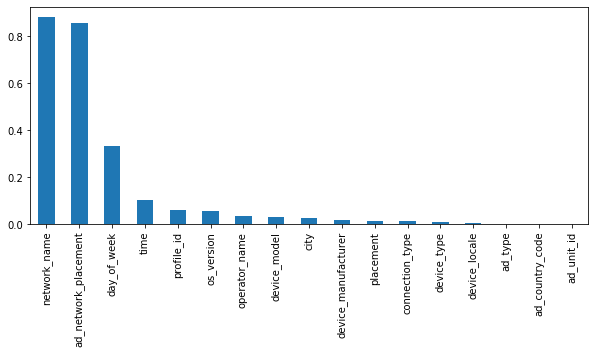

In [32]:
X_int = X.query('ad_type=="int"')
y_int = X_int.pop("revenue")
mi_int = make_mi_scores(X_int, y_int)
del X_int, y_int
print('INT')
print(mi_int)
mi_int.sort_values(ascending=False).plot.bar(figsize=(10, 4))


RV
ad_network_placement    1.229793
network_name            0.470521
day_of_week             0.116880
profile_id              0.056752
device_model            0.045258
operator_name           0.043359
os_version              0.039557
placement               0.036381
time                    0.029017
city                    0.026219
device_manufacturer     0.024410
connection_type         0.016100
ad_type                 0.008451
device_locale           0.007440
device_type             0.004813
ad_unit_id              0.001614
ad_country_code         0.000000
Name: MI Scores, dtype: float64


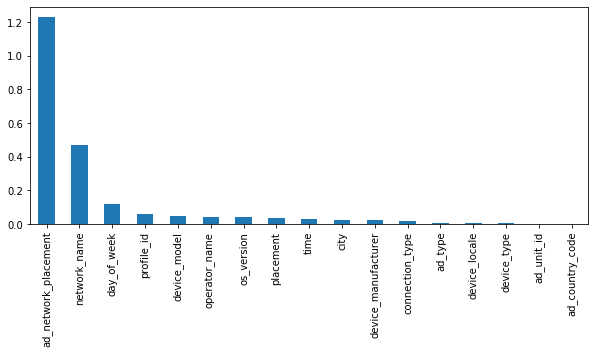

In [33]:
X_rv = X.query('ad_type=="rv"')
y_rv = X_rv.pop("revenue")
mi_rv=make_mi_scores(X_rv, y_rv)
del X_rv, y_rv
print('RV')
print(mi_rv)
mi_rv.sort_values(ascending=False).plot.bar(figsize=(10, 4))


Так как переменная ad_network_placement принимает значения в соответствии с видом рекламы, строить график сравнения групп не имееет смысла. Рассмотрим виды рекламы отдельно. eCPM очевидно зависит от этой переменной. 

In [34]:
data_grouped_ad_network_placement = data.groupby(['ad_network_placement', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x)*1000})

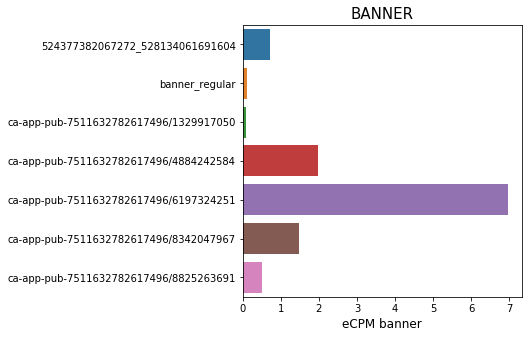

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))    
sns.barplot(data=data_grouped_ad_network_placement.query('ad_type=="banner"'), x='revenue', y='ad_network_placement')
ax.set_xlabel('eCPM banner', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('BANNER', fontsize=15)
plt.show()

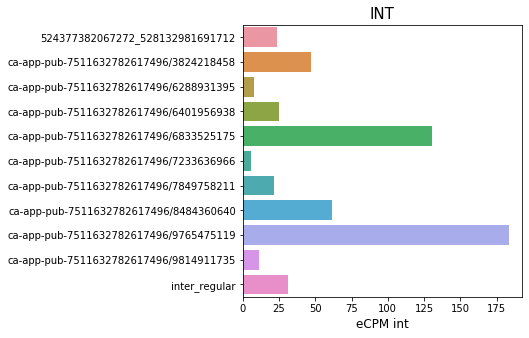

In [36]:
fig, ax=plt.subplots(figsize=(5, 5))    
sns.barplot(data=data_grouped_ad_network_placement.query('ad_type=="int"'), x='revenue', y='ad_network_placement')
ax.set_xlabel('eCPM int', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('INT', fontsize=15)
plt.show()

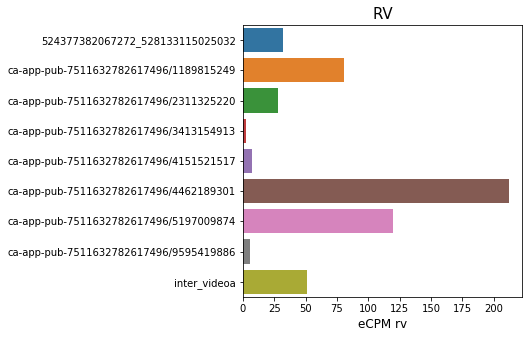

In [37]:
fig, ax=plt.subplots(figsize=(5, 5))    
sns.barplot(data=data_grouped_ad_network_placement.query('ad_type=="rv"'), x='revenue', y='ad_network_placement')
ax.set_xlabel('eCPM rv', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('RV', fontsize=15)
plt.show()

Дополнительно рассмотрим переменную placement для типа рекламы rv, так как она значима для этого типа.

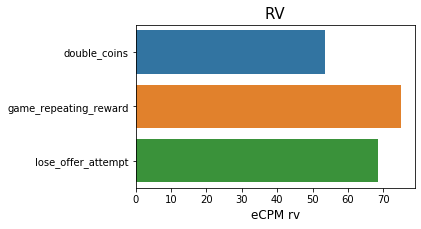

In [38]:
data_grouped_placement = data.query('ad_type=="rv"').groupby(['placement'], as_index=False).agg({'revenue': lambda x: np.mean(x) * 1000})

fig, ax = plt.subplots(figsize=(5, 3))    
sns.barplot(data=data_grouped_placement, x='revenue', y='placement')
ax.set_xlabel('eCPM rv', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('RV', fontsize=15)
plt.show()

Далее рассмотрим влияние сети на eCPM. Google AdMob заметно лидирует.

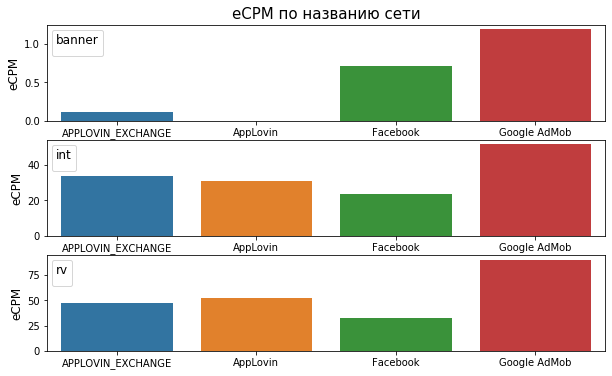

In [39]:
data_grouped_network_name = data.groupby(['network_name', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x)*1000})
order_bar = sorted(data_grouped_network_name['network_name'].unique())

fig, (ax, ax2, ax3)=plt.subplots(3, 1, figsize=(10, 6))    
sns.barplot(data=data_grouped_network_name.query('ad_type=="banner"'), x='network_name', y='revenue', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_network_name.query('ad_type=="int"'), x='network_name', y='revenue', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_network_name.query('ad_type=="rv"'), x='network_name', y='revenue', order=order_bar, ax=ax3)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.legend(title='banner', title_fontsize = "12", labels=[])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('eCPM', fontsize=12)
ax2.legend(title='int', title_fontsize = "12",labels=[])
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('eCPM', fontsize=12)
ax3.legend(title='rv', title_fontsize = "12",labels=[])
ax.set_title('eCPM по названию сети', fontsize=15)                
plt.show()

Следующая переменная это день недели. Неожиданно, что различные виды рекламы полулярны в разные дни недели и что воскресенье демонстрирует спад eCPM. Хотя выборку по дням недели нельзя назвать репрезентатитвной т.к. данные содержат информацию всего за 10 дней.

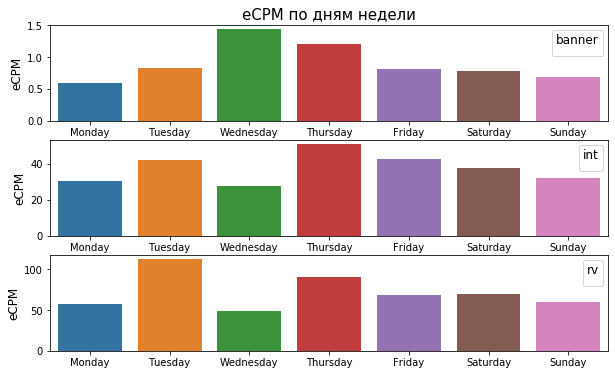

In [40]:
weekdict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_of_week'] = data['day_of_week'].sort_values().map(weekdict)

data_grouped_weekday = data.groupby(['day_of_week', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x) * 1000})

order_bar = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))    
sns.barplot(data=data_grouped_weekday.query('ad_type=="banner"'), x='day_of_week', y='revenue', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_weekday.query('ad_type=="int"'), x='day_of_week', y='revenue', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_weekday.query('ad_type=="rv"'), x='day_of_week', y='revenue', order=order_bar, ax=ax3)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.legend(title='banner', title_fontsize = "12", labels=[])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('eCPM', fontsize=12)
ax2.legend(title='int', title_fontsize = "12", labels=[])
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('eCPM', fontsize=12)
ax3.legend(title='rv', title_fontsize = "12", labels=[])
ax.set_title('eCPM по дням недели', fontsize=15)                
plt.show()    

Теперь построим график зависимости eCPM от производителя девайсов. Кажется, что пользователям с девайсами разного производства нравится разная реклама, но часто это всего 1 или 2 пользователя. 

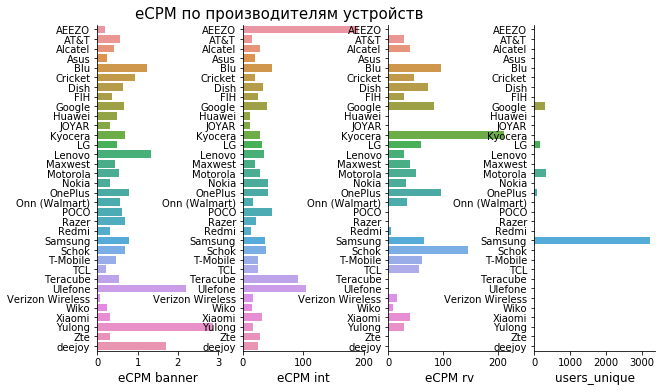

In [41]:
data_grouped_user_unique = data.groupby(['device_manufacturer'], as_index=False).agg({'profile_id': lambda x: x.nunique()})
data_grouped_device_manufacturer = data.groupby(['device_manufacturer', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x)*1000})
order_bar = sorted(data_grouped_device_manufacturer['device_manufacturer'].unique())

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 6))    
sns.barplot(data=data_grouped_device_manufacturer.query('ad_type=="banner"'), x='revenue', y='device_manufacturer', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_device_manufacturer.query('ad_type=="int"'), x='revenue', y='device_manufacturer', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_device_manufacturer.query('ad_type=="rv"'), x='revenue', y='device_manufacturer', order=order_bar, ax=ax3)
sns.barplot(data=data_grouped_user_unique, x='profile_id', y='device_manufacturer', order=order_bar, ax=ax4)
ax.set_xlabel('eCPM banner', fontsize=12)
ax.set_ylabel('',fontsize=12)
ax2.set_xlabel('eCPM int', fontsize=12)
ax2.set_ylabel('',fontsize=12)
ax3.set_xlabel('eCPM rv', fontsize=12)
ax3.set_ylabel('',fontsize=12)
ax4.set_xlabel('users_unique', fontsize=12)
ax4.set_ylabel('', fontsize=12)
ax.set_title('eCPM по производителям устройств', fontsize=15, x=1.5)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

Последняя категориальная переменная, по которой мы построим график это оператор сети. Исключим из списка операторов пустые значения. Этот график снова показывает, что без знания числа уникальных пользователей можно сделать ложные выводы. eCPM очевидно сильно зависит от конкретного пользователя игры и для заначений переменных, для которых существует мало уникальных пользователей, демонстрирует сильные отклонения. Есть подозрения, что часть операторов сотовой связи это один и тот же оператор, но без знания особенностей компаний данного региона было решено оставить их как различных операторов, кроме ('Verizon')

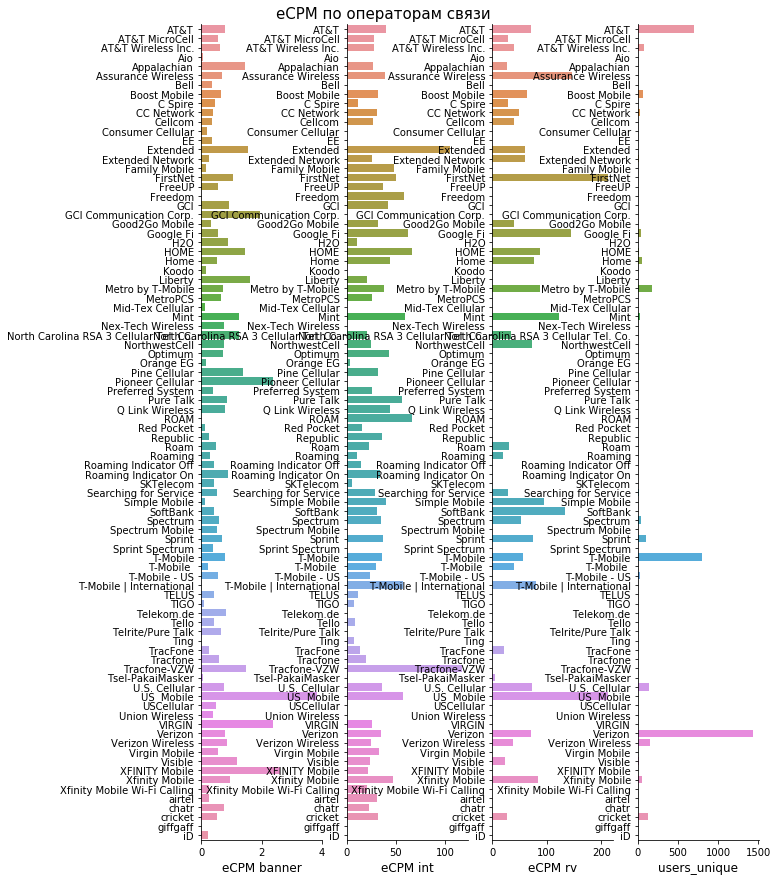

In [42]:
data['operator_name'].fillna(' ',inplace=True)

ind = data[(data.operator_name.str.startswith('Verizon')) & ~(data.operator_name.str.endswith('less'))].index
data.loc[ind,'operator_name'] = 'Verizon'

data_grouped_user_unique_operator = data.groupby(['operator_name'], as_index=False).agg({'profile_id': lambda x: x.nunique()})
data_grouped_user_unique_operator = data_grouped_user_unique_operator.query('operator_name!=" " & operator_name!="\xa0"')
data_grouped_operator_name = data.groupby(['operator_name', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x)*1000})
data_grouped_operator_name = data_grouped_operator_name.query('operator_name!=" " & operator_name!="\xa0"')
order_bar = sorted(data_grouped_operator_name['operator_name'].unique())

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 15))    
sns.barplot(data=data_grouped_operator_name.query('ad_type=="banner"'), x='revenue', y='operator_name', order=order_bar, ax=ax)
sns.barplot(data=data_grouped_operator_name.query('ad_type=="int"'), x='revenue', y='operator_name', order=order_bar, ax=ax2)
sns.barplot(data=data_grouped_operator_name.query('ad_type=="rv"'), x='revenue', y='operator_name', order=order_bar, ax=ax3)
sns.barplot(data=data_grouped_user_unique_operator, x='profile_id', y='operator_name', order=order_bar, ax=ax4)
ax.set_xlabel('eCPM banner', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax2.set_xlabel('eCPM int', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax3.set_xlabel('eCPM rv', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax4.set_xlabel('users_unique', fontsize=12)
ax4.set_ylabel('', fontsize=12)
ax.set_title('eCPM по операторам связи', fontsize=15, x=1.5)                
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

Попробуем найти линейные зависимости между доходом за показ и количественными переменными по видам рекламы. Проще всего использовать корреляцию Спирмана, т.к. распределение далеко от нормального.

In [43]:
X = data.copy()
cols=X.select_dtypes(include=np.number).columns.tolist()
cols.append('ad_type')
X=X[cols]

In [44]:
X_banner=X.query('ad_type=="banner"').sample(frac=0.05, replace=False, random_state=0)
y_banner = X_banner.pop("revenue")
X_banner.corrwith(y_banner,method='spearman')

event_timestamp           -0.254810
event_receive_timestamp   -0.253411
view_index                      NaN
session_view_index              NaN
cur_ticks                 -0.254824
session_length            -0.242919
ads_ltv                    0.104879
ecpm_sma                   0.865160
normalized_ecpm_sma        0.865160
value                      1.000000
dtype: float64

In [45]:
X_int=X.query('ad_type=="int"')
y_int = X_int.pop("revenue")
X_int.corrwith(y_int,method='spearman')

event_timestamp           -0.110931
event_receive_timestamp   -0.112077
view_index                -0.326282
session_view_index        -0.162215
cur_ticks                 -0.110863
session_length            -0.151019
ads_ltv                    0.094389
ecpm_sma                   0.833871
normalized_ecpm_sma        0.830709
value                      1.000000
dtype: float64

In [46]:
X_rv=X.query('ad_type=="rv"')
y_rv = X_rv.pop("revenue")
X_rv.corrwith(y_rv,method='spearman')

event_timestamp           -0.063188
event_receive_timestamp   -0.062787
view_index                -0.320570
session_view_index        -0.216793
cur_ticks                 -0.063079
session_length            -0.189000
ads_ltv                    0.155104
ecpm_sma                   0.852658
normalized_ecpm_sma        0.850561
value                      1.000000
dtype: float64

Как показал анализ, кроме зависимых переменных ecpm, есть смысл рассмотреть только пременную view_index.

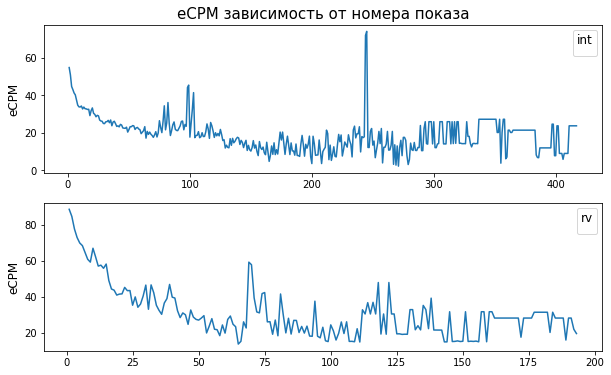

In [47]:
data_grouped_view = data.groupby(['view_index', 'ad_type'], as_index=False).agg({'revenue': lambda x: np.mean(x) * 1000})

fig, (ax, ax2)=plt.subplots(2, 1, figsize=(10, 6))    
sns.lineplot(data=data_grouped_view.query('ad_type=="int"'), x='view_index', y='revenue', ax=ax)
sns.lineplot(data=data_grouped_view.query('ad_type=="rv"'), x='view_index', y='revenue', ax=ax2)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('eCPM', fontsize=12)
ax.legend(title='int', title_fontsize = "12", labels=[])
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('eCPM', fontsize=12)
ax2.legend(title='rv', title_fontsize = "12", labels=[])
ax.set_title('eCPM зависимость от номера показа', fontsize=15)                
plt.show()    

По итогам исследования можно сказать, что наибольшее влияние на eCPM оказывают 2 фактора: рекламная сеть + место размещения рекламы и уровень жизни конкретного пользователя (современность телефона или планшета, благоприятный город проживания и т.д.). Также новая реклама, очевидно, более эффективна.